### Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
import tensorflow as tf

/home/sb/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from my_utils import *

In [4]:
# Print version info
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [5]:
# Use ggplot style
plt.style.use('ggplot')

### Image data

In [6]:
# Load images
# http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
dirn = "./data/img_align_celeba"
img_files = [os.path.join(dirn, f) for f in os.listdir(dirn) if ".jpg" in f]
print("Number of images:",len(img_files))

Number of images: 100


Filename: ./data/img_align_celeba/000090.jpg
img shapes is (218, 178, 3)
[[[ 20  44  31]
  [ 20  44  31]
  [ 20  44  31]
  ..., 
  [ 16  44  29]
  [ 16  44  29]
  [ 16  44  29]]

 [[ 20  44  31]
  [ 20  44  31]
  [ 20  44  31]
  ..., 
  [ 16  44  29]
  [ 16  44  29]
  [ 16  44  29]]

 [[ 20  44  31]
  [ 20  44  31]
  [ 20  44  31]
  ..., 
  [ 16  44  29]
  [ 16  44  29]
  [ 16  44  29]]

 ..., 
 [[230 231 236]
  [230 231 236]
  [177 178 183]
  ..., 
  [ 17  43  30]
  [ 17  43  30]
  [ 17  43  30]]

 [[246 245 251]
  [211 210 216]
  [ 76  77  82]
  ..., 
  [ 17  43  30]
  [ 17  43  30]
  [ 17  43  30]]

 [[220 219 225]
  [181 180 186]
  [ 47  46  52]
  ..., 
  [ 17  43  30]
  [ 17  43  30]
  [ 17  43  30]]]


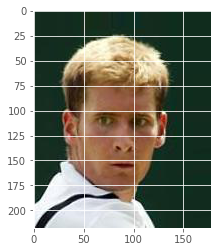

In [7]:
# Visualize any one image
idx = 10
print("Filename:",img_files[idx])
img = plt.imread(img_files[idx])
print("img shapes is", img.shape)
plt.imshow(img, interpolation='nearest')
print(img)
# One of the RGB channels
#plt.imshow(img[:,:,0])

In [8]:
# Read images:
imgs_d = [plt.imread(f) for f in img_files]
type(imgs_d)

list

In [9]:
# Convert images to array
imgs = np.array(imgs_d)
imgs.shape

(100, 218, 178, 3)

<class 'numpy.ndarray'>
(218, 178, 3)


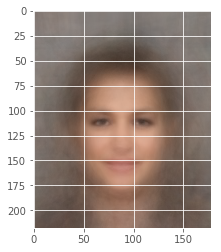

In [10]:
# Mean of the imgs:
mean = np.mean(imgs, axis = 0)
print(type(mean))
print(mean.shape)
plt.imshow(mean.astype(np.uint8))

<class 'numpy.ndarray'>
(218, 178, 3)


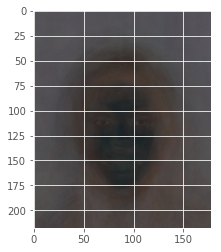

In [11]:
# Std dev od imgs:
std = np.std(imgs, axis = 0)
print(type(std))
print(std.shape)
plt.imshow(std.astype(np.uint8))

In [12]:
# Flatten images
f_imgs = imgs.ravel()
f_imgs.shape

(11641200,)

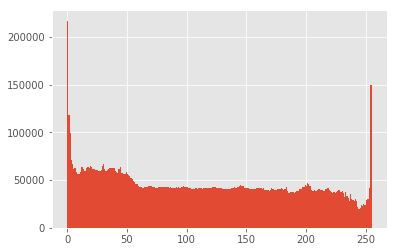

In [13]:
# Plot overall img pixel disbn
_ = plt.hist(f_imgs, 255)

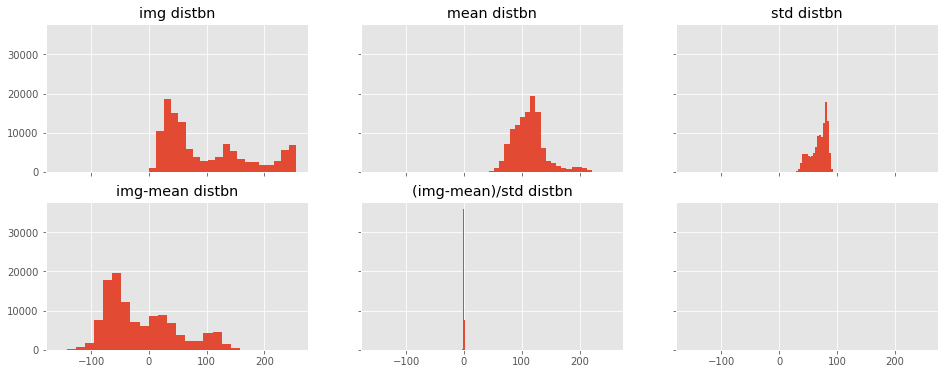

In [14]:
# Plot overall img pixel disbn for 1 image
fig, ax = plt.subplots(2, 3, figsize = (16,6), sharex = True, sharey = True)
bins = 20
img = imgs[0]
ax[0][0].set_title('img distbn')
ax[0][1].set_title('mean distbn')
ax[0][2].set_title('std distbn')
ax[1][0].set_title('img-mean distbn')
ax[1][1].set_title('(img-mean)/std distbn')
_ = ax[0][0].hist(img.ravel(),bins)
_ = ax[0][1].hist(mean.ravel(),bins)
_ = ax[0][2].hist(std.ravel(),bins)
_ = ax[1][0].hist((img-mean).ravel(),bins)
_ = ax[1][1].hist(((img-mean)/std).ravel(),bins)

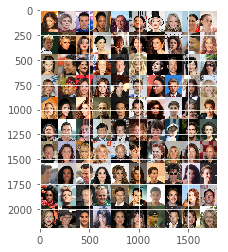

In [15]:
all_img = 'dataset.png'
plt.imshow(all_imgs(imgs, all_img))
plt.imshow(plt.imread(all_img))

### Numpy functions and tensors

In [16]:
# Use of numpy newaxis and concatenate
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(a)
print(b)
print(a.shape, b.shape)

# Creates new axis
a_new = a[:,:,np.newaxis]
print(a_new)
print(a_new.shape)

# Concatenate along axis 2. Could use np.stack as well without np.newaxis
c = np.concatenate([a[:,:,np.newaxis] for _ in range(3)], axis=2)
print(c)
print(c.shape)
print(c[:,:,2])

[[1 2]
 [3 4]]
[[5 6]]
(2, 2) (1, 2)
[[[1]
  [2]]

 [[3]
  [4]]]
(2, 2, 1)
[[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]]
(2, 2, 3)
[[1 2]
 [3 4]]


In [17]:
# 3d and 4d tensors examples
a_3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]], [[13,14,15],[16,17,18]]])
print(a_3d[0][0])
print(a_3d.shape)

a_4d = np.array([[[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]], [[13,14,15],[16,17,18]]],
                  [[[51,52,53],[54,55,56]],[[57,58,59],[60,61,62]], [[63,64,65],[66,67,68]]]  ])
print(a_4d[1][2])
print(a_4d.shape)

[1 2 3]
(3, 2, 3)
[[63 64 65]
 [66 67 68]]
(2, 3, 2, 3)


### Tensorflow basics

#### Tensors, operations, sessions

In [18]:
# Normal variables
x = np.linspace(-3.0, 3.0, 100)
print(x.dtype, x.shape)
x

float64 (100,)


array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [19]:
## Tensorflow variable
x = tf.linspace(-3.0, 3.0, 100)
print(x.dtype, x.shape)
x

<dtype: 'float32'> (100,)


<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [20]:
# Tf default graph and operations
tf_def_g = tf.get_default_graph()
#tf_ops = tf_def_g.get_operations()
#print(tf_ops)
#[op.name for op in tf_ops]

In [21]:
# Alterate way to get x - output of LinSpace operation
tf_def_g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [22]:
# Multiple ways to run the session
sess = tf.Session()
print("1st way", sess.run(x))
print("2nd way", x.eval(session=sess))
sess.close()

with tf.Session() as sess:
    print("3rd way", sess.run(x))
    print("4th way", x.eval(session=sess))
    
sess = tf.InteractiveSession()
print("5th way", x.eval())
sess.close()


1st way [-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969

In [23]:
sess = tf.InteractiveSession()

In [24]:
# Tensor shape
print(x.get_shape(), x.get_shape().as_list())

(100,) [100]


#### Mean, std, normalize

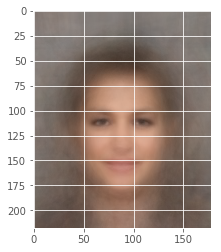

In [25]:
# Use tf to get mean and stddev

# dtype for tflow
imgs_tf = imgs.astype(np.float32)

# Mean
mean_img = tf.reduce_mean(imgs_tf, axis = 0, keep_dims=True)

# Std dev
diff = imgs_tf - mean_img
std_dev_img = tf.sqrt(tf.reduce_mean((imgs_tf - mean_img)**2, axis = 0))

# Eval
mean_img_res = sess.run(mean_img)
std_dev_img_res = sess.run(std_dev_img)

# Plot
plt.imshow(np.squeeze(std_dev_img_res.astype(np.uint8)))
plt.imshow(np.squeeze(mean_img_res.astype(np.uint8)))
#imgs_tf.shape, mean_img.shape, mean_img_res.shape

In [26]:
### Normalize
norm_imgs_op = (imgs - mean_img)/std_dev_img
norm_imgs_res = sess.run(norm_imgs_op)

# For matlpotlib, get it to 0 to 1
norm_imgs_res = (norm_imgs_res - np.min(norm_imgs_res))/(np.max(norm_imgs_res) - np.min(norm_imgs_res))

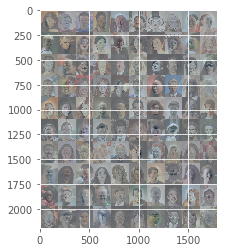

In [27]:
# View all normalized images
all_img = 'norm_dataset.png'
plt.imshow(all_imgs(norm_imgs_res, all_img))
plt.imshow(plt.imread(all_img))

#### Convolution

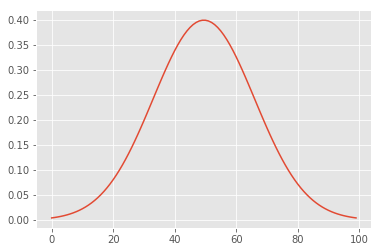

In [28]:
# Gaussian distrbn - 1d
mean = 0.0
sigma = 1.0
#z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) * 
#             (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z = tf.exp(-(x-mean)**2 / (2.0*sigma**2)) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))
pdf = z.eval()
plt.plot(pdf)

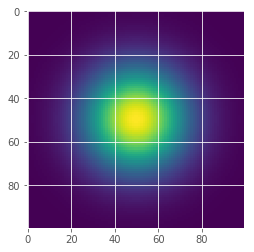

In [29]:
# Gaussian distrbn - 2d
n = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [n,1]), tf.reshape(z,[1,n]))
pdf = z_2d.eval()
plt.imshow(pdf)

(218, 178, 3) (218, 178)


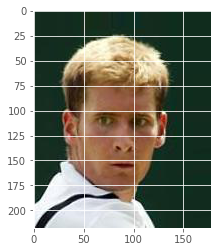

In [30]:
img = plt.imread(img_files[10])
img_rchan = img[:,:,0]
plt.imshow(img)
print(img.shape, img_rchan.shape)

Tensor("Reshape_2:0", shape=(1, 218, 178, 3), dtype=float32)
(100, 100)
(100, 100, 3, 1)
(1, 218, 178, 1)
(218, 178)


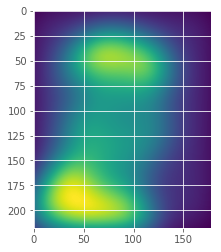

In [31]:
# Convolve image with gaussian kernel (no tf placeholders)

# Image (reshape to batchsize x imgh x imgw x num_channels)
img = plt.imread(img_files[10])
plt.imshow(img)
img = img.astype(np.float32)
img_tf = tf.reshape(img, [1, img.shape[0], img.shape[1], 3])
print(img_tf)

# Gaussian 3d kernel (reshape to n x n x num_inchannels x num_out_channels)
with tf.Session() as sess:
    comp_z_2d = z_2d.eval()
print(comp_z_2d.shape)
z_3d = np.concatenate([comp_z_2d[:,:,np.newaxis] for _ in range(3)], axis=2)
z_4d = tf.reshape(z_3d, [n, n, 3, 1])
print(z_4d.shape)

# Convolve
conv_out = tf.nn.conv2d(img_tf, z_4d, strides = [1,1,1,1], padding = 'SAME')
comp_conv_out = conv_out.eval()
print(comp_conv_out.shape)
print(np.squeeze(comp_conv_out).shape)
plt.imshow(np.squeeze(comp_conv_out))

In [32]:
# Open session again
sess.close()
sess = tf.InteractiveSession()

dims of img_in [None, None]
dims of img_in_4d is [1, None, None, 1]
shapes of sinw, sinw_2d are (?,) (?, ?)
shapes of gabor_2d, gabor_4d are (?, ?) (?, ?, 1, 1)
(1, 218, 178, 1)


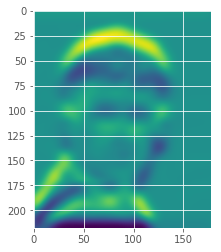

In [33]:
# Convolve image with gabor kernel (use tf placeholders) for 1 channel img

# Image (reshape to batchsize x imgh x imgw x num_channels)
img_in = tf.placeholder(tf.float32, shape=[None, None], name='img_in')
print("dims of img_in", img_in.get_shape().as_list())
img_in_4d = tf.expand_dims(img_in,2)
img_in_4d = tf.expand_dims(img_in_4d,0)
print("dims of img_in_4d is", img_in_4d.get_shape().as_list())

# Gabor kernel (reshape to n x n x num_inchannels x num_out_channels)
mean = tf.placeholder(tf.float32,name='mean')
sigma = tf.placeholder(tf.float32,name='sigma')
kernelsize = tf.placeholder(tf.int32,name='kernelsize')
x = tf.linspace(-3.0,3.0,kernelsize)
z = tf.exp(-(x-mean)**2 / (2.0*sigma**2)) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))
z_2d = tf.matmul(tf.reshape(z,tf.stack([kernelsize,1])), 
                 tf.reshape(z,tf.stack([1,kernelsize])))

sinw = tf.sin(x)  
sinw_2d = tf.matmul(tf.reshape(sinw, tf.stack([kernelsize, 1])), 
                    tf.ones(tf.stack([1, kernelsize])) ) 
gabor_2d = tf.matmul(sinw_2d, z_2d)
gabor_4d = tf.reshape(gabor_2d, tf.stack([kernelsize,kernelsize,1,1]))
print("shapes of sinw, sinw_2d are",sinw.shape,sinw_2d.shape)
print("shapes of gabor_2d, gabor_4d are", gabor_2d.shape, gabor_4d.shape)

# Convolve 
conv_out = tf.nn.conv2d(img_in_4d, gabor_4d, strides=[1,1,1,1], padding ='SAME')

# Evaluate graph
feed_dict_val = {img_in:img_rchan, mean:0.0, sigma:1.0, kernelsize:32}
result = conv_out.eval(feed_dict = feed_dict_val)
print(result.shape)
plt.imshow(result[0,:,:,0])

dims of img_in [None, None, 3]
dims of img_in_4d is [1, 218, 178, 3]
shapes of sinw, sinw_2d are (?,) (?, ?)
shapes of gabor_2d, gabor_3d, gabor_4d are (?, ?) (?, ?, 3) (?, ?, 3, 1)
(1, 218, 178, 1)


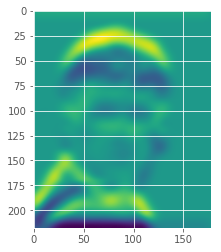

In [34]:
# Convolve image with gabor kernel (use tf placeholders) for 3 channel img

# Image (reshape to batchsize x imgh x imgw x num_channels)
img_in = tf.placeholder(tf.float32, shape=[None, None,3], name='img_in')
print("dims of img_in", img_in.get_shape().as_list())
img_in_4d = tf.expand_dims(img,0)
print("dims of img_in_4d is", img_in_4d.get_shape().as_list())

# Gabor kernel (reshape to n x n x num_inchannels x num_out_channels)
mean = tf.placeholder(tf.float32,name='mean')
sigma = tf.placeholder(tf.float32,name='sigma')
kernelsize = tf.placeholder(tf.int32,name='kernelsize')
x = tf.linspace(-3.0,3.0,kernelsize)
z = tf.exp(-(x-mean)**2 / (2.0*sigma**2)) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))
z_2d = tf.matmul(tf.reshape(z,tf.stack([kernelsize,1])), 
                 tf.reshape(z,tf.stack([1,kernelsize])))

sinw = tf.sin(x)  
sinw_2d = tf.matmul(tf.reshape(sinw, tf.stack([kernelsize, 1])), 
                    tf.ones(tf.stack([1, kernelsize])) ) 
gabor_2d = tf.matmul(sinw_2d, z_2d)
gabor_3d = tf.concat([tf.reshape(gabor_2d, 
                                 tf.stack([kernelsize, kernelsize, 1])) for _ in range(3)], 
                                 axis=2)
gabor_4d = tf.reshape(gabor_3d, tf.stack([kernelsize,kernelsize,3,1]))
print("shapes of sinw, sinw_2d are",sinw.shape,sinw_2d.shape)
print("shapes of gabor_2d, gabor_3d, gabor_4d are", gabor_2d.shape, gabor_3d.shape, gabor_4d.shape)

# Convolve 
conv_out = tf.nn.conv2d(img_in_4d, gabor_4d, strides=[1,1,1,1], padding ='SAME')

# Evaluate graph
feed_dict_val = {img_in:img, mean:0.0, sigma:1.0, kernelsize:32}
result = conv_out.eval(feed_dict = feed_dict_val)
print(result.shape)
plt.imshow(result[0,:,:,0])

#### Convolve entire dataset

In [35]:
# Convolve image dataset with gabor kernel (use tf placeholders) for 3 channel img
sess.close()
sess = tf.InteractiveSession()

# Gabor kernel (reshape to n x n x num_inchannels x num_out_channels)
mean = tf.placeholder(tf.float32,name='mean')
sigma = tf.placeholder(tf.float32,name='sigma')
kernelsize = tf.placeholder(tf.int32,name='kernelsize')
x = tf.linspace(-3.0,3.0,kernelsize)
z = tf.exp(-(x-mean)**2 / (2.0*sigma**2)) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))
z_2d = tf.matmul(tf.reshape(z,tf.stack([kernelsize,1])), 
                 tf.reshape(z,tf.stack([1,kernelsize])))
sinw = tf.sin(x)  
sinw_2d = tf.matmul(tf.reshape(sinw, tf.stack([kernelsize, 1])), 
                    tf.ones(tf.stack([1, kernelsize])) ) 
gabor_2d = tf.matmul(sinw_2d, z_2d)
gabor_3d = tf.concat([tf.reshape(gabor_2d, 
                                 tf.stack([kernelsize, kernelsize, 1])) for _ in range(3)], 
                                 axis=2)
gabor_4d = tf.reshape(gabor_3d, tf.stack([kernelsize,kernelsize,3,1]))
print("shapes of sinw, sinw_2d are",sinw.shape,sinw_2d.shape)
print("shapes of gabor_2d, gabor_3d, gabor_4d are", gabor_2d.shape, gabor_3d.shape, gabor_4d.shape)
gabor_4d_res = gabor_4d.eval(feed_dict={mean:0.0, sigma:1.0, kernelsize:32})


# Convolve 
conv_out = tf.nn.conv2d(imgs_tf, gabor_4d_res, strides=[1,1,1,1], padding ='SAME')

# Evaluate graph
result = sess.run(conv_out)
print(result.shape)

shapes of sinw, sinw_2d are (?,) (?, ?)
shapes of gabor_2d, gabor_3d, gabor_4d are (?, ?) (?, ?, 3) (?, ?, 3, 1)
(100, 218, 178, 1)


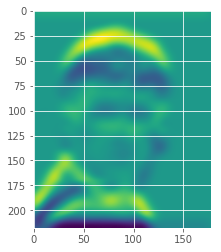

In [36]:
# Visualize results
plt.imshow(result[10,:,:,0])

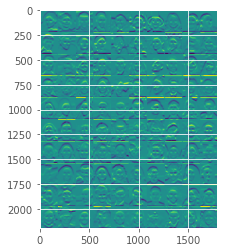

In [37]:
# View all conv out of images
all_img = 'conv_dataset.png'
#res_show = (result - np.min(result)) / (np.max(result) - np.min(result))
plt.imshow(all_imgs(result[:,:,:,0], all_img))
plt.imshow(plt.imread(all_img))

In [38]:
# Sort images by highest value of mean of convout pixels
flattened_result = tf.reshape(result, [100, result.shape[1]* result.shape[2]*result.shape[3]] )
mean_values = tf.reduce_sum(flattened_result, axis = 1)
img_idxs = tf.nn.top_k(mean_values, k = 100)[1]
img_idxs_res = sess.run(img_idxs)
imgs_sorted_on_conv = np.array([imgs[idx] for idx in img_idxs_res])

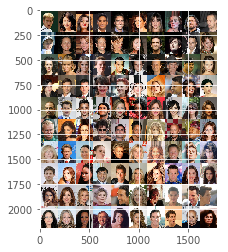

In [39]:
# View all images sorted by max value of convout mean pixel value
all_img = 'sorted_conv_dataset.png'
plt.imshow(all_imgs(imgs_sorted_on_conv, all_img))
plt.imshow(plt.imread(all_img))